<a href="https://colab.research.google.com/github/nkr9/Deep-learning-experiment/blob/main/Convolutional_Neural_Network_(CNN)_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experment 6 Developing a Convolution Neural Network (CNN)


# Convolutional Layer <a id="1"></a>
This layer is the main building block of CNN. Responsible for perceiving the features of the picture. This layer applies some filters to the image to remove low and high level features in the image. For example, this filter may be a filter to detect edges. These filters are usually multi-dimensional and contain pixel values. (5x5x3) represent the height and width of 5 matrices, the depth of 3 matrices.



For example, only 1 channel will be processed for simplicity.
Let's assume that the picture is a 5 × 5 dimension and consists of 1's and 0's. Let's create our filter in 3 × 3 dimensions.



Now let's take a look at how the filter is applied:



First, the filter is positioned in the upper left corner of the image. Here, the indices between the two matrices (image and filter) are multiplied by each other and all the results are summed, then the result is stored in the output matrix. Then move this filter to the right by 1 pixel (also known as “step”) and repeat the process. After the 1st line is over, the 2nd line is passed and the transactions are repeated. The output matrix is created after all operations are finished. The reason why the output matrix is 3 × 3 is because the 3 × 3 filter in the 5 × 5 matrix moves 3 times horizontally and vertically.

If the image was 6 × 4 and the filter was 3 × 3, the output matrix would be 4 × 2.

So what does the output matrix tell us? This matrix is often called Feature Map. Shows the location of the image in the property represented by the filter. In short, we detect our properties by moving the filter over the image and using the simple matrix product.
Usually, multiple filters are used to detect multiple features, that is, a Cnn network has multiple Convolutional layers. Take a look at the animation below, here is a little more visually explained:

When we apply the first filter, we create a Feature Map and identify a feature type. Next, we create a second Feature Map that uses a second filter and detects another feature type.
As we can see in the example above, these filters can be simple, but they can become complicated if you want to extract some complex features in the image. You can browse the animation below to see more complex filters.

<img src="https://cdn-images-1.medium.com/max/640/1*S1WhBMR7wLN4DViZTljQ5w.gif" width="550" height="200"/>

Another thing we mentioned earlier, but not explained in detail, is stride.

This term is often used in conjunction with the term padding. Stride controls how the filter evolves around the input image. In the example above, Stride was 1 pixel, but it could be larger. This affects the size of the output of the Feature Map.

In the early stages of Cnn, we need to protect as much information as possible for other Convolutional Layers when applying the first filters. Here padding is used for this reason. You may have noticed that the Feature Map is smaller than the original input image. Therefore, Padding will add zero values to this map to maintain the size of the image (as in the image below):

<img src="https://cdn-images-1.medium.com/max/1000/0*wD3fHOCzj9cWXt_6" width="260" height="250"/>

# Non-linearity  <a id="2"></a>
Non-Linearity layer usually comes after all Convolutional layers. So why is the linearity in the image a problem? The problem is that the Neural Network acts as a single perception, since all layers can be a linear function, so the result can be calculated as a linear combination of outputs. This layer is called Activation Layer because one of the activation functions is used. In the past, nonlinear functions such as sigmoid and tahn have been used, but this function is now being used as the Rectifier (ReLu) function gives the best result on the speed of Neural Network training.
> **ReLu Function f(x) = max(0, x)**

When the ReLu function is applied to the Feature Map, a result like below is produced.

<img src="https://miro.medium.com/max/1240/0*AgDOXRGswiJSQ9mB" width="650" height="220"/>

Black values ​​in the Feature Map are negative. After relu function is applied, black values are removed and 0 is replaced.

# Pooling Layer  <a id="3"></a>
This layer is a layer that is frequently added between consecutive convolutional layers in CovNet. The task of this layer is to reduce the shift size of the impression and the parameters and number of calculations within the network. In this way, incompatibility in the network is checked. There are many Pooling operations, but the most popular is max pooling. There are also average pooling, and L2-norm pooling algorithms working on the same principle.
Let's go by explaining this process over the figures. First of all, let's create a 2×2 filter. You can see this filter on the picture below (4x4). As you can see in the picture, the filter gets the largest number in the area it covers. In this way, it uses smaller outputs that contain enough information for the neural network to make the right decision.

<img src="https://www.oreilly.com/radar/wp-content/uploads/sites/3/2019/06/Figure_4-87c227113cdd0b73d842267404d4aa00.gif" width="500" height="300"/>


# Flattening Layer <a id="4"></a>
The task of this layer is simply to prepare the data at the entrance of the last and most important layer, Fully Connected Layer. Generally, neural networks receive input data from a one-dimensional array. The data in this neural network is the one-dimensional array of matrixes from the Convolutional and Pooling layer.

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png" width="900" height="450"/>


# Fully-Connected Layer  <a id="5"></a>
This layer is the last and most important layer of ConvNet. It takes the data from the flattening process and performs the learning process via the neural network.

---

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading the Data Set <a id="6"></a>
* In this part we load and visualize the data.


In [3]:
train_df = pd.read_csv("/content/sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [4]:
pd.DataFrame({
    'X': ['Train Shape','Different number of labels','Different number of labels (Sum)' ],
    'Y': [train_df.shape, train_df.label.unique(), len(train_df.label.unique())],
})

,X,Y
0,Train Shape,"(12095, 785)"
1,Different number of labels,"[3, 6, 2, 13, 16, 8, 22, 18, 10, 20, 17, 19, 2..."
2,Different number of labels (Sum),24


In [6]:
test_df = pd.read_csv("/content/sign_mnist_test.csv")
print("Test Shape: ", test_df.shape)
test_df.head()

Test Shape:  (2416, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


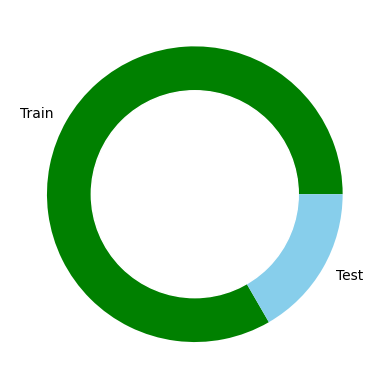

In [7]:
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie([len(train_df),len(test_df)], labels=["Train","Test"], colors=['green','skyblue'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
# I synchronize the numbers it represents to a variable in the form of an array
Y_train = train_df['label']
Y_test = test_df['label']

X_train = train_df.drop(["label"],axis=1)
X_test = test_df.drop(["label"],axis=1)

del train_df['label']
del test_df['label']

,count
label,
17,574
16,564
18,536
22,532
11,532
23,529
3,527
14,526
19,521


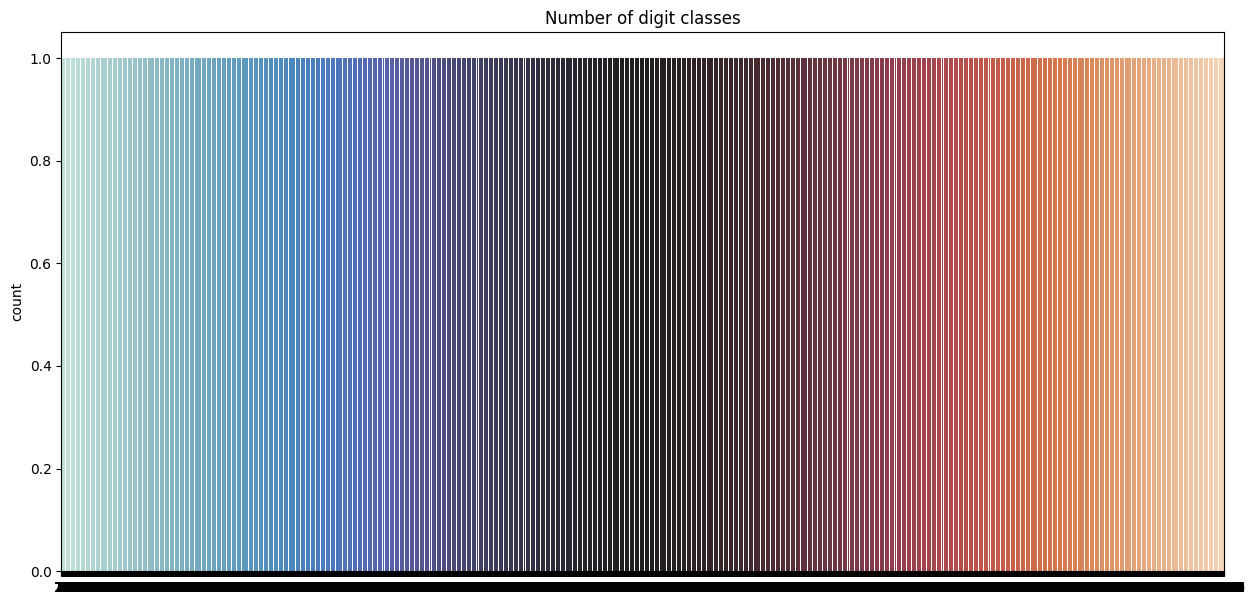

In [10]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

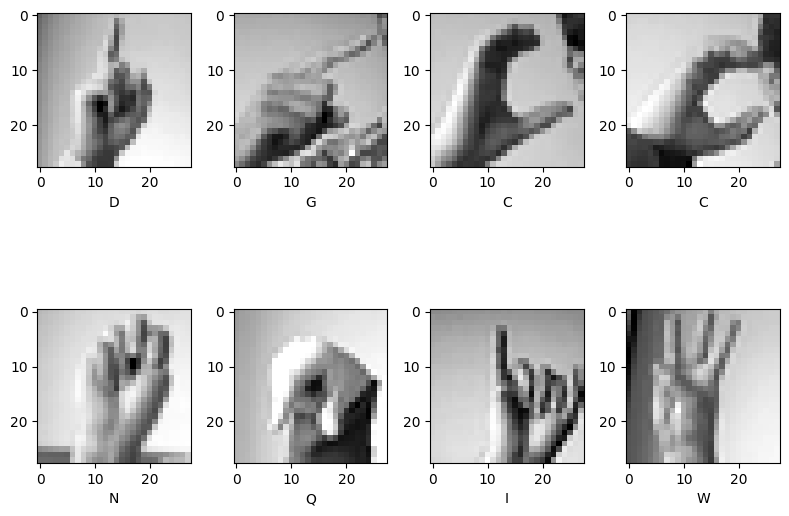

In [11]:
f, ax = plt.subplots(2,4)
f.set_size_inches(8,8)

k = 0
for i in range(2):
    for j in range(4):
        img = X_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel(chr(Y_train[k] + 65))
        ax[i,j].imshow(img,cmap='gray')
        k += 1
    plt.tight_layout()

# Normalization, Reshape and Label Encoding <a id="7"></a>
* **Normalization**
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* **Reshape**
    * Train and test images (28 x 28)
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
* **Label Encoding**
    * Encode labels to one hot vectors
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]


In [12]:
# normalize the data
X_train = X_train/255.0
X_test = X_test/255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (12095, 784)
X_test shape:  (2416, 784)


In [13]:
# reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (12095, 28, 28, 1)
X_test shape:  (2416, 28, 28, 1)


In [14]:
# label encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

# Train Test Split <a id="8"></a>
* We split the data into train and test sets.
* test size is 15%
* train size is 85%

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (10280, 28, 28, 1)
x_test shape (1815, 28, 28, 1)
y_train shape (10280, 24)
y_test shape (1815, 24)


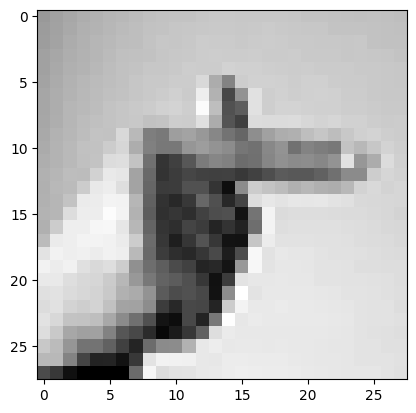

In [16]:
plt.imshow(X_train[10][:,:,0],cmap="gray")
plt.show()

In [19]:
from tensorflow.keras.utils import to_categorical


In [21]:
!pip install tensorflow


In [24]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters=75 , kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides = 2 , padding = 'same'))

model.add(Conv2D(filters=50, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2 , padding = 'same'))

model.add(Conv2D(filters=25, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,449 (1.00 MB)

 Trainable params: 263,449 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
optimizer = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999)


In [27]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
epochs = 25  # for better result increase the epochs
batch_size = 200

In [29]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=15,  # randomly rotate images in the range 15 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.15,  # randomly shift images horizontally 15%
        height_shift_range=0.15,  # randomly shift images vertically 15%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [31]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size
)


Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 672ms/step - accuracy: 0.0504 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0150 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 517ms/step - accuracy: 0.0425 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0400 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 518ms/step - accuracy: 0.0385 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0500 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 529ms/step - accuracy: 0.0412 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.0400 - loss: nan - val_accuracy: 0.0419 - val_loss: nan
Epoch 9/25
51/51 ━━━━━━━

### fit() & fit_genarator()
* In keras, fit() is much similar to sklearn's fit method, where you pass array of features as x values and target as y values. You pass your whole dataset at once in fit method. Also, use it if you can load whole data into your memory (small dataset).
* In fit_generator(), you don't pass the x and y directly, instead they come from a generator. As it is written in keras documentation, generator is used when you want to avoid duplicate data when using multiprocessing. This is for practical purpose, when you have large dataset.

### Dropout
* It prevents over learning.
* It increases diversity.

### Epoch & Batch & Number of Iteration
* **one epoch: ** one forward pass and one backward pass of all the training examples
* **batch size:** the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
* **number of iterations:** number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

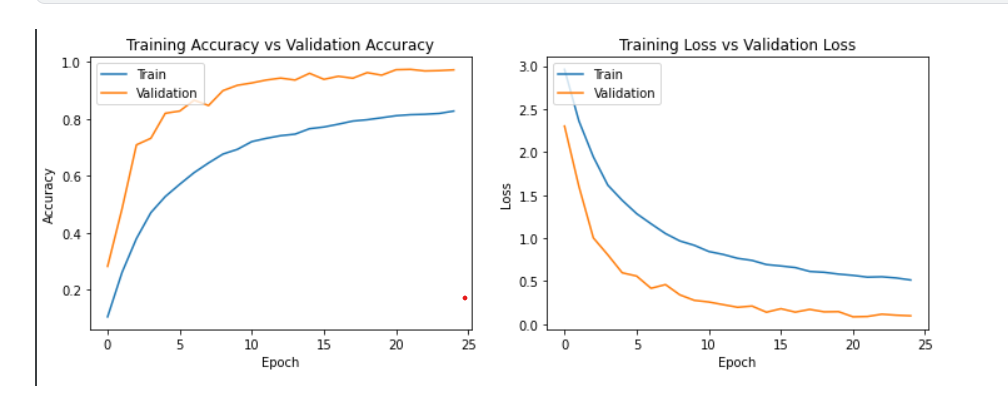)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


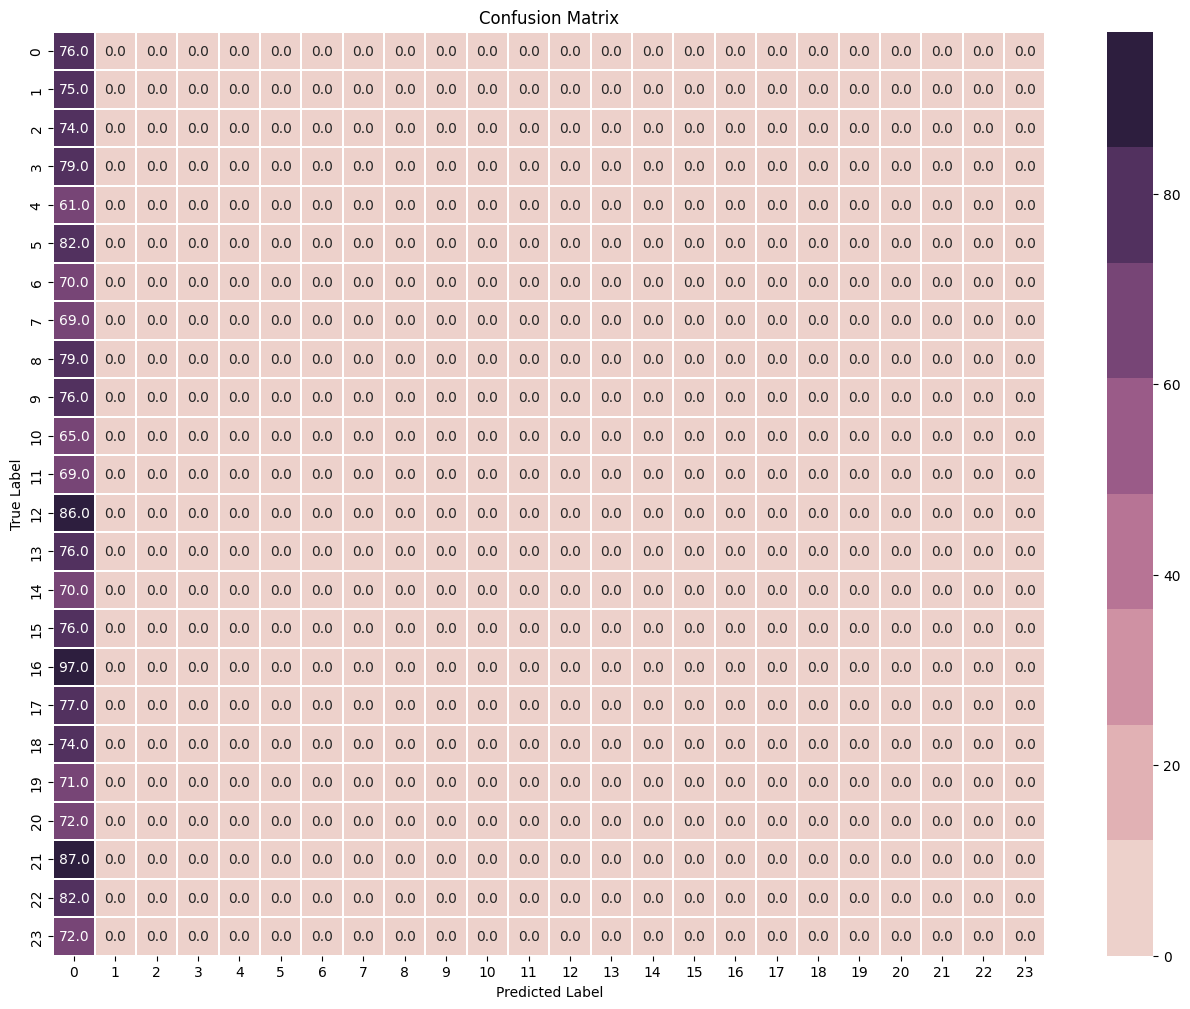

In [35]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(16, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap=sns.cubehelix_palette(8),fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()